In [7]:
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.datamodel.base_models import InputFormat
from docling.datamodel.document import DoclingDocument
from docling.document_converter import PdfFormatOption , DocumentConverter
import fitz

/home/pepito/Documents/Python/ML/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Convert a document
The first thing that we want to do  is to take our original document , here it is a pdf document and convert it to **DoclingDocument** . A  **document converter** decompose the document into different Items as :  
- Image items 
- Table items
- Text items  

And then we have different layout where every elements has different attributes. For example a text item will have a **text attribute** that will contains the text of the TextItem.  

Here is a function that create a personnalized pipeline to convert a **pdf document** to a **DoclingDocument** .  
In our pipeline I decided to use OCR and also generate picture images and extracts the table structure

In [8]:
def convert_with_pipeline (path:str) -> DoclingDocument:
    
    pipeline_options = PdfPipelineOptions(
        do_ocr= True,
        do_table_structure= True,
        generate_picture_images= True
    )
    
    converter = DocumentConverter(
        format_options= {
            InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
        }
    )
    
    return converter.convert(path).document


Let's test it with the official `docling papper`

In [10]:
docling_doc = convert_with_pipeline("../Docling/docs/docling.pdf")

2025-12-10 16:15:52,794 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-12-10 16:15:52,824 - INFO - Going to convert document batch...
2025-12-10 16:15:52,825 - INFO - Initializing pipeline for StandardPdfPipeline with options hash 8e7b949cc226caef8aab3aadca70e8e7
2025-12-10 16:15:53,521 - WARNING - The plugin langchain_docling will not be loaded because Docling is being executed with allow_external_plugins=false.
2025-12-10 16:15:53,522 - INFO - Loading plugin 'docling_defaults'
2025-12-10 16:15:53,523 - INFO - Registered picture descriptions: ['vlm', 'api']
2025-12-10 16:15:53,530 - WARNING - The plugin langchain_docling will not be loaded because Docling is being executed with allow_external_plugins=false.
2025-12-10 16:15:53,531 - INFO - Loading plugin 'docling_defaults'
2025-12-10 16:15:53,533 - INFO - Registered ocr engines: ['auto', 'easyocr', 'ocrmac', 'rapidocr', 'tesserocr', 'tesseract']
2025-12-10 16:15:55,595 - INFO - Accelerator device: 'cuda:0'
[INFO] 2025-12-1

Let's see what kind of attributes has our **DoclingDocument**

In [4]:
DoclingDoc_attributes = list(docling_doc.__dict__.keys())
DoclingDoc_attributes

['schema_name',
 'version',
 'name',
 'origin',
 'furniture',
 'body',
 'groups',
 'texts',
 'pictures',
 'tables',
 'key_value_items',
 'form_items',
 'pages']

You can see the different attributes that I told you before . 

Let's explore what every attributes contains.  



In [5]:
# The name contains tha name of your file
print(f"The name of the doc is {docling_doc.name}")

# If you want to have the entire filename you can take it from the origin attributes
print(f"The entire filename is : {docling_doc.origin.filename}")

The name of the doc is docling
The entire filename is : docling.pdf


Ok now we have some infos about the the origin and the name of every doc , it can be useful for the retrievement , if we want to display the source  !

Let's see what contains the body and the groups of this document :

In [6]:
# The body attributes
body = docling_doc.body
body_attributes = list(body.__dict__.keys())
print(f"The attributes of a the body are : \n{body_attributes}\n")


#Let's see the children
print(f"The children of the body are \n{body.children}")

The attributes of a the body are : 
['self_ref', 'parent', 'children', 'content_layer', 'meta', 'name', 'label']

The children of the body are 
[RefItem(cref='#/texts/0'), RefItem(cref='#/pictures/0'), RefItem(cref='#/texts/1'), RefItem(cref='#/texts/2'), RefItem(cref='#/texts/3'), RefItem(cref='#/texts/4'), RefItem(cref='#/texts/5'), RefItem(cref='#/texts/6'), RefItem(cref='#/texts/7'), RefItem(cref='#/texts/8'), RefItem(cref='#/texts/9'), RefItem(cref='#/texts/10'), RefItem(cref='#/texts/11'), RefItem(cref='#/texts/12'), RefItem(cref='#/groups/0'), RefItem(cref='#/texts/19'), RefItem(cref='#/texts/20'), RefItem(cref='#/texts/21'), RefItem(cref='#/texts/22'), RefItem(cref='#/texts/23'), RefItem(cref='#/texts/24'), RefItem(cref='#/texts/25'), RefItem(cref='#/texts/26'), RefItem(cref='#/texts/27'), RefItem(cref='#/texts/28'), RefItem(cref='#/texts/29'), RefItem(cref='#/texts/30'), RefItem(cref='#/pictures/1'), RefItem(cref='#/texts/47'), RefItem(cref='#/texts/48'), RefItem(cref='#/texts

<u>Quick explanation :</u>  

As I told you the document is decomposed into differents items , the body here contains these items in the order of the document.  

**PS**: A group is a list of bullet point 

Let's move to another attribute , the **groups** one (smooth transition init? )

In [7]:
# What does groups contains
group_attribute = docling_doc.groups
print(f" Groups contains a list of ListGroup here are they: \n {group_attribute}\n")

#Let's see what a ListGroup contains
list_group0 = group_attribute[0]
print(f"Here are the attributes of a ListGroup item: \n{list(list_group0.__dict__.keys())}")

 Groups contains a list of ListGroup here are they: 
 [ListGroup(self_ref='#/groups/0', parent=RefItem(cref='#/body'), children=[RefItem(cref='#/texts/13'), RefItem(cref='#/texts/14'), RefItem(cref='#/texts/15'), RefItem(cref='#/texts/16'), RefItem(cref='#/texts/17'), RefItem(cref='#/texts/18')], content_layer=<ContentLayer.BODY: 'body'>, meta=None, name='list', label=<GroupLabel.LIST: 'list'>), ListGroup(self_ref='#/groups/1', parent=RefItem(cref='#/body'), children=[RefItem(cref='#/texts/79'), RefItem(cref='#/texts/80')], content_layer=<ContentLayer.BODY: 'body'>, meta=None, name='list', label=<GroupLabel.LIST: 'list'>), ListGroup(self_ref='#/groups/2', parent=RefItem(cref='#/body'), children=[RefItem(cref='#/texts/83'), RefItem(cref='#/texts/84'), RefItem(cref='#/texts/85'), RefItem(cref='#/texts/86'), RefItem(cref='#/texts/87'), RefItem(cref='#/texts/88'), RefItem(cref='#/texts/89'), RefItem(cref='#/texts/90'), RefItem(cref='#/texts/91'), RefItem(cref='#/texts/92'), RefItem(cref='#

What really matters in  a group is :  

- The children:  
It contains the different items of the list and number of their items 
- The label :
It contains the label of the group 

In [8]:
# The children of the group 
print(f"The children of this group are :\n {list_group0.children}\n")

# You can see the different text part that contains the group 

print(f"The group label is {list_group0.label} ")

The children of this group are :
 [RefItem(cref='#/texts/13'), RefItem(cref='#/texts/14'), RefItem(cref='#/texts/15'), RefItem(cref='#/texts/16'), RefItem(cref='#/texts/17'), RefItem(cref='#/texts/18')]

The group label is list 


Okay you may think that is not the most improtant thing for chunking and you're right !
So for that we can see the **text** attributes that contains all the TextItems of your document

In [9]:
#Text elements
text_items = docling_doc.texts

print(f"There are {len(text_items)} text items in the document\n")

#Let's see the attributes of a TextItem 
print(f"A TextItem has these attributes:\n {list(text_items[0].__dict__)}\n")


There are 1095 text items in the document

A TextItem has these attributes:
 ['self_ref', 'parent', 'children', 'content_layer', 'meta', 'label', 'prov', 'orig', 'text', 'formatting', 'hyperlink']



What in my opinion can be useful are thes attributes :  

- The **label** that shows you if the Item is a *section_header* , a *page_header* or *text*  
- The **prov** which is a list of **ProvenanceItem** where you can find the *page_no* of the TextItem but also a feature that I think is amazing: **a bounding box coordinates** , it allows to afterall highlight the following TextItem !  
- The **text** of the TextItem

In [10]:
#The text 
print(f" Here is the text of the first Item :\n{text_items[0].text}")

#The provenance of the text
print(f"The prov object is :\n {text_items[0].prov}")

#Let's the page of the TextItem
print(f"The page number is :\n{text_items[0].prov[0].page_no}\nand the box that contains the text item is :\n{text_items[0].prov[0].bbox}\n")

 Here is the text of the first Item :
arXiv:2408.09869v5  [cs.CL]  9 Dec 2024
The prov object is :
 [ProvenanceItem(page_no=1, bbox=BoundingBox(l=18.34, t=627.0, r=36.34, b=237.0, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 39))]
The page number is :
1
and the box that contains the text item is :
l=18.34 t=627.0 r=36.34 b=237.0 coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>



That's nice but the thing is that I discovered this framework while I was looking for a way to include **tables** and **images** in my package: QuickRAG.  

**So what about the images ?**  

No worries the document contains an attribute: **pictures** that is a list of **PictureItem** where each picture has different attributes and a usual here are the most important ones:  

- The **Label**
- The **provenance**
- The **image** attributes that contains the base64 code of the picture


Here is the list of images that the Document contains :
[PictureItem(self_ref='#/pictures/0', parent=RefItem(cref='#/body'), children=[], content_layer=<ContentLayer.BODY: 'body'>, meta=None, label=<DocItemLabel.PICTURE: 'picture'>, prov=[ProvenanceItem(page_no=1, bbox=BoundingBox(l=256.393310546875, t=719.1369705200195, r=355.67926025390625, b=622.8756408691406, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), charspan=(0, 0))], captions=[], references=[], footnotes=[], image=ImageRef(mimetype='image/png', dpi=72, size=Size(width=100.0, height=96.0), uri=AnyUrl('')), annotations=[]), PictureItem(self_ref='#/pictures/1', parent=RefItem(cref='#/body'), children=[RefItem(cref='#/texts/31'), RefItem(cref='#/texts/32'), RefItem(cref='#/texts/33'), RefItem(cref='#/texts/34'), RefItem(cref='#/texts/35'), RefItem(cref='#/texts/36'), RefItem(cref='#/texts/37'), RefItem(cref='#/texts/38'), RefItem(cref='#/texts/39'), RefItem(cref='#/texts/40'), RefItem(cref='#/texts/41'), RefItem(cref='#/t
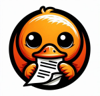
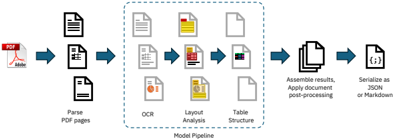
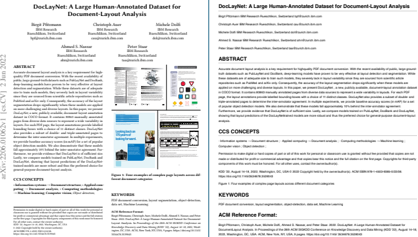
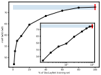
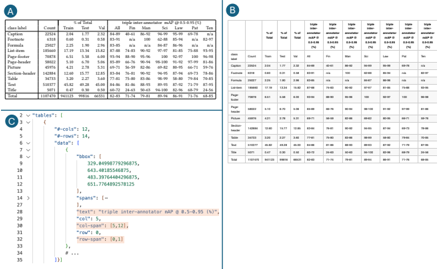

In [11]:
#Image
image_list = docling_doc.pictures
print(f'Here is the list of images that the Document contains :\n{image_list}\n')
print(f"It contains {len(image_list)} images")

#Attributes of one image
picture_attributes = print(f"The attributes of an image are :\n{list(image_list[0].__dict__)}\n")

#Label of the image
label = image_list[0].label
print(f"Here is the label of a picture:\n{label}\n")

#Image attributes
image= image_list[0].image
print(f"The attributes of the image attributes are :\n{list(image.__dict__.keys())}")

base_64_url = image_list[0].image.uri._url
base64_image = str(base_64_url).split(",",1)[1]
print(base64_image)

And finally the tables !

In [12]:
from docling.chunking import HybridChunker,HierarchicalChunker
from transformers import AutoTokenizer

In [13]:
MODEL_ID = "sentence-transformers/all-MiniLM-L6-v2"
tok = AutoTokenizer.from_pretrained(MODEL_ID)
# chunker = HybridChunker(
#     tokenizer=tok,
    
# )

chunker = HierarchicalChunker()
context_chunks = []
chunks_list = list(chunker.chunk(dl_doc=docling_doc))

for c in chunks_list:
    cc = chunker.contextualize(c)
    context_chunks.append(cc)
    


In [14]:
context_chunks[2]

'Abstract\nThis technical report introduces Docling , an easy to use, self-contained, MITlicensed open-source package for PDF document conversion. It is powered by state-of-the-art specialized AI models for layout analysis (DocLayNet) and table structure recognition (TableFormer), and runs efficiently on commodity hardware in a small resource budget. The code interface allows for easy extensibility and addition of new features and models.'

In [15]:
page = chunks_list[2].meta.doc_items[0].prov[0].page_no
bbox = chunks_list[2].meta.doc_items[0].prov[0].bbox
chunks_list[0].text

'Christoph Auer Maksym Lysak Ahmed Nassar Michele Dolfi Nikolaos Livathinos Panos Vagenas Cesar Berrospi Ramis Matteo Omenetti Fabian Lindlbauer Kasper Dinkla Lokesh Mishra Yusik Kim Shubham Gupta Rafael Teixeira de Lima Valery Weber Lucas Morin Ingmar Meijer Viktor Kuropiatnyk Peter W. J. Staar'

I defined a function that hightlights a specific part of the document by using it's bbox and the page where the chunk is in the document.

In [16]:
def highlight_retrieved_part(page_no,bbox):
    doc = fitz.open("./docling.pdf")
    
    page_no = page_no-1
    page = doc[page_no] 
    
    # bbox docling
    l, r = bbox.l, bbox.r
    t, b = bbox.t, bbox.b

    # boîte réelle de PyMuPDF
    page_w = page.rect.width
    page_h = page.rect.height

    # CONVERSION 
    x1 = l
    x2 = r
    y1 = page_h - t   # inversion Y
    y2 = page_h - b   # inversion Y

    rect = fitz.Rect(x1, y1, x2, y2)
    annot = page.add_highlight_annot(rect)

    doc.save("out.pdf")
    doc.close()


# Get all the attributes of the items of a document 

I wanted to have a type that contains all the information that a pdf contains . Let's create a specific class that process a document and returns the main information that we want .
But before let's define an util function that will returns the  item that we want and that have a specific id

In [ ]:
def get_element_by_type_and_id(doc: DoclingDocument,
                               type:str ,
                               id: int):
    """Get an element by its type and its id

    Args:
        doc (DoclingDocument): The doc
        type (str): the type
        id (int): the id

    Raises:
        Exception: If index out of range
        
    """
    if type not in ["texts","pictures","tables"]:
        raise Exception("The type provided is not a correct type\n=====REMINDER=======\nTHE TYPE MUST BELONGS TO ['texts','pictures','tables']")
    
    try:
        elem = getattr(doc,type)
        return elem[id]
    except Exception as e:
        print(f"ERROR WHILE TRYING TO FIND THE ASKED ELEMENT :\n=====ERROR======\n")
        return 
        
e = get_element_by_type_and_id(docling_doc,"texts",444)


['#', 'texts', '444']

In [ ]:
from docling.document_converter import PdfFormatOption , DocumentConverter
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling_core.types.doc import BoundingBox
from docling.datamodel.document import DoclingDocument
from pydantic import BaseModel



#Pydantic model for text Items
class TextAttributes(BaseModel):
    text: str
    bbox: BoundingBox | None
    label: str
    n_page: int | None

#Pydantic model for Table attributes
class TableAttributes(BaseModel):
    bbox: BoundingBox |None
    n_page: int | None
    caption : str | None

#Pydantic model for Image pictures
class ImageAttributes(BaseModel):
    bbox: BoundingBox | None
    n_page: int |None
    caption : str | None
    text_children : list[TextAttributes | TableAttributes] | None
    base64_url : str
    


    
# Let's create first a pydantic model which will represent the attributes of every docling document
class DocAttributes(BaseModel):
    filename: str
    n_text: int
    n_pictures: int
    n_tables: int
    texts: list[TextAttributes]
    images: list[ImageAttributes]
    tables: list[TableAttributes]
    
class DocumentProcessor:
    
    def __init__(self,
                 do_ocr : bool = True,
                 do_table:bool = True,
                 generate_pic: bool = True
                 ):
        
        pipeline = PdfPipelineOptions(
            do_ocr= do_ocr,
            do_table_structure=do_table,
            generate_picture_images= generate_pic,
        )
        
        self.converter = DocumentConverter(
            format_options={
                InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline)
            }
        )

    
    def process(self,
                paths: list[str]) -> list[DoclingDocument]:
        
        
        #Verify if there is a doc path
        if not paths or len(paths)==0:
            raise Exception("No paths detected . Verify your arguments")
        
        #Convert all avery documents to a docling document
        docling_docs = []
        for path in paths :
            docling_docs.append(
                self.converter.convert(path).document
            )
        return docling_docs
            
    def generate_attributes(self,
                            docling_docs : list[DoclingDocument]):
        
        """Generate all the attributes for every document

        Args:
            docling_docs (list[DoclingDocument]): List of DocLing documents
        """
        if len(docling_docs) ==0 :
            raise ValueError("No documents provided , try again ")
        
        def _process_text(text_items_list:list):
            list_attributes = []
            for item in text_items_list:
                text_att = TextAttributes(
                    text=item.text,
                    label=item.label.name.lower(),
                    n_page=item.prov[0].page_no if item.prov else None,
                    bbox=item.prov[0].bbox if item.prov else None
                )
                list_attributes.append(text_att)
            return list_attributes
        
        def _process_images(image_items:list,doc:DoclingDocument):
            for item in image_items:
                #Verify is the item has children and extract them
                if item.children:
                    for children in item.children:
                        type = children.cref.split("/")[1]
                        element = get_element_by_type_and_id(
                            doc=doc,
                            id=children.cref.split("/")[2],
                            type=type
                        )
                        if type == "texts":
                            _process_text(text_items_list= [element])
                        if type == "tables":
                            _process_text()
                            
                        
                image_att = ImageAttributes(
                    caption= item.captions if item.captions  else None,
                    n_page=item.prov[0].page_no if item.prov  else None,
                    bbox=item.prov[0].bbox if item.prov  else None,
                    base64= item.image.uri.__str__()
                )
            return image_att
        
        def _process_tables(table_items:list):
            for item in table_items:
                image_att = ImageAttributes(
                    caption= item.captions if item.captions  else None,
                    n_page=item.prov[0].page_no if item.prov  else None,
                    bbox=item.prov[0].bbox if item.prov  else None
                )
        

                
            
        
        

    
        

In [ ]:
processor = DocumentProcessor()
paths = ["../Docling/docs/docling.pdf","../Docling/docs/trans.pdf"]
docling_docs = processor.process(paths=paths)

{'self_ref': '#/pictures/4',
 'parent': RefItem(cref='#/body'),
 'children': [RefItem(cref='#/texts/622'),
  RefItem(cref='#/texts/623'),
  RefItem(cref='#/texts/624'),
  RefItem(cref='#/texts/625'),
  RefItem(cref='#/texts/626'),
  RefItem(cref='#/texts/627'),
  RefItem(cref='#/texts/628'),
  RefItem(cref='#/texts/629'),
  RefItem(cref='#/texts/630'),
  RefItem(cref='#/texts/631'),
  RefItem(cref='#/texts/632'),
  RefItem(cref='#/texts/633'),
  RefItem(cref='#/texts/634'),
  RefItem(cref='#/texts/635'),
  RefItem(cref='#/texts/636'),
  RefItem(cref='#/texts/637'),
  RefItem(cref='#/texts/638'),
  RefItem(cref='#/texts/639'),
  RefItem(cref='#/texts/640'),
  RefItem(cref='#/texts/641'),
  RefItem(cref='#/texts/642'),
  RefItem(cref='#/texts/643'),
  RefItem(cref='#/texts/644'),
  RefItem(cref='#/texts/645'),
  RefItem(cref='#/texts/646'),
  RefItem(cref='#/texts/647'),
  RefItem(cref='#/texts/648'),
  RefItem(cref='#/texts/649'),
  RefItem(cref='#/texts/650'),
  RefItem(cref='#/texts/6
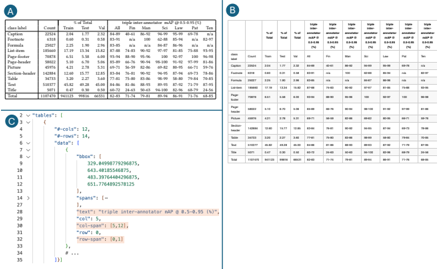

In [99]:
docling_doc.tables[0].data.table_cells
docling_doc.pictures[4].__dict__


In [38]:
import requests
import json
from dotenv import load_dotenv
import os

load_dotenv()
OPENROUTER_API_KEY = os.getenv("OPENROUTER_API_KEY")
data_url =docling_doc.pictures[1].image.uri.__str__()

# First API call with reasoning
response = requests.post(
  url="https://openrouter.ai/api/v1/chat/completions",
  headers={
    "Authorization": f"Bearer {OPENROUTER_API_KEY}",
    "Content-Type": "application/json",
  },
  
  data=json.dumps({
    "model": "nvidia/nemotron-nano-12b-v2-vl:free",
    "messages": [
        {
          "role": "user",
          "content": [
            {"type": "text ",
             "text": "Describe what there is in this image"
             },
            {
              "type":"image_url",
              "image_url": {
                "url": data_url
              }
            }
            ]
        }
      ],
    "reasoning": {"enabled": False}
  })
)

# Extract the assistant message with reasoning_details
response = response.json()
response = response['choices'][0]['message']

In [42]:
response['content']

'This image illustrates a typical workflow or pipeline for processing PDF documents. Here is information on the different steps: \n\nStep 1: Parsing PDF Pages\nPDF pages are extracted.\n\nStep 2: OCR (Optical Character Recognition)\nEach image is passed through OCR software to recognize and extract text characters.\n\nStep 3: Layout Analysis\nText blocks, tables, images, headers, footers, etc. are identified.\n\nStep 4: Table Structure Recognition\nThe specific structure of each table, including columns, rows, and cell boundaries, is extracted.\n\nStep 5: Assembling Results\nThe text, tables, and layout elements are reassembled into a structured format.\nAdditional post-processing may be applied.\n\nStep 6: Serialization as JSON or Markdown\nThe assembled results are serialized into a structured format.\n'